# Análisis de los accidentes

## Importar librerías

In [2]:
# Librerías básicas
import pandas as pd
import numpy as np

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configuraciones de estilo
sns.set(style="whitegrid")  # estilo de seaborn
plt.rcParams['figure.figsize'] = (10,6)  # tamaño de figuras por defecto


## Cargar CSV Limpio

In [3]:
df = pd.read_csv("../data/processed/accidentes_limpios_2024.csv", sep=';')
df.head()

,ID_ACCIDENTE,ANYO,MES,DIA_SEMANA,DIA_SEMANA_NOMBRE,HORA,PROVINCIA,COD_MUNICIPIO,ZONA,ZONA_AGRUPADA,...,PRIORI_HORIZ_STOP_NOMBRE,PRIORI_HORIZ_CEDA_NOMBRE,PRIORI_MARCAS_NOMBRE,PRIORI_PEA_NO_ELEV_NOMBRE,PRIORI_PEA_ELEV_NOMBRE,PRIORI_MARCA_CICLOS_NOMBRE,PRIORI_CIRCUNSTANCIAL_NOMBRE,PRIORI_OTRA_NOMBRE,ACERA_NOMBRE,TRAZADO_PLANTA_NOMBRE
0,1,2024,1,3,MIÉRCOLES,22,Araba/Álava,0,1,1,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,No aplica,Recta
1,2,2024,1,6,SÁBADO,23,Araba/Álava,1036,1,1,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,No aplica,Curva sin señalizar
2,3,2024,1,7,DOMINGO,1,Araba/Álava,0,1,1,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,No aplica,Recta
3,4,2024,1,7,DOMINGO,8,Araba/Álava,0,1,1,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,No aplica,Curva sin señalizar
4,5,2024,1,4,JUEVES,17,Araba/Álava,0,1,1,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,No aplica,Recta


## Filtrar ruido de categorías minoritarias

In [60]:
print("Número de filas y columnas:", df.shape)

df.info()
conteo_tipos = df['TIPO_ACCIDENTE_NOMBRE'].value_counts()

# Umbral: Por ejemplo, tipos con más de 100 accidentes
tipos_relevantes = conteo_tipos[conteo_tipos > 100].index

# Filtramos el dataframe original
df_filtrado = df[df['TIPO_ACCIDENTE_NOMBRE'].isin(tipos_relevantes)]
df.describe()

Número de filas y columnas: (101996, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101996 entries, 0 to 101995
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ID_ACCIDENTE                  101996 non-null  int64  
 1   ANYO                          101996 non-null  int64  
 2   MES                           101996 non-null  int64  
 3   DIA_SEMANA                    101996 non-null  int64  
 4   DIA_SEMANA_NOMBRE             101996 non-null  object 
 5   HORA                          101996 non-null  int64  
 6   PROVINCIA                     101996 non-null  object 
 7   COD_MUNICIPIO                 101996 non-null  int64  
 8   ZONA                          101996 non-null  int64  
 9   ZONA_AGRUPADA                 101996 non-null  int64  
 10  CARRETERA                     101996 non-null  object 
 11  KM                            38814 non-null   float64
 12  SEN

,ID_ACCIDENTE,ANYO,MES,DIA_SEMANA,HORA,COD_MUNICIPIO,ZONA,ZONA_AGRUPADA,KM,SENTIDO_1F,TITULARIDAD_VIA,TIPO_VIA,TIPO_ACCIDENTE,TOTAL_MU24H,TOTAL_HG24H,TOTAL_HL24H,TOTAL_VICTIMAS_24H,TOTAL_VEHICULOS,MUERTOS_VEHICULOS,DIF_MUERTOS
count,101996.000000,101996.0,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000,38814.000000,101996.000000,101996.000000,101996.000000,101961.000000,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000
mean,50998.500000,2024.0,6.571022,3.873250,13.711940,21182.727058,2.284246,1.649280,99.194025,3.322424,3.873221,8.457038,7.142398,0.014922,0.096131,1.226528,1.337582,1.728813,0.014844,0.000078
std,29443.853365,0.0,3.392339,1.944702,5.304717,15639.183504,0.951911,0.477198,225.912973,1.135597,16.538012,3.296533,5.680241,0.133555,0.333475,0.855379,0.835522,0.728143,0.133197,0.008856
min,1.000000,2024.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,25499.750000,2024.0,4.000000,2.000000,10.000000,8019.000000,1.000000,1.000000,3.500000,2.000000,3.000000,6.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,50998.500000,2024.0,7.000000,4.000000,14.000000,23050.000000,3.000000,2.000000,13.600000,4.000000,4.000000,9.000000,4.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000
75%,76497.250000,2024.0,10.000000,5.000000,18.000000,32054.000000,3.000000,2.000000,69.987500,4.000000,4.000000,9.000000,10.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000
max,101996.000000,2024.0,12.000000,7.000000,23.000000,52001.000000,4.000000,2.000000,9999.000000,4.000000,999.000000,14.000000,20.000000,6.000000,9.000000,40.000000,49.000000,32.000000,6.000000,1.000000


## Crear mátrica "Letalidad"

In [61]:
# Índice de Letalidad: fallecidos por cada 100 víctimas
df['INDICE_LETALIDAD'] = (df['TOTAL_MU24H'] / df['TOTAL_VICTIMAS_24H']) * 100


## El Análisis de la "Gravedad"

C:\Users\ELOY\AppData\Local\Temp\ipykernel_30992\4110037951.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=via_stats.index, y=via_stats['Total_Accidentes'], ax=ax1, palette='viridis', alpha=0.7)


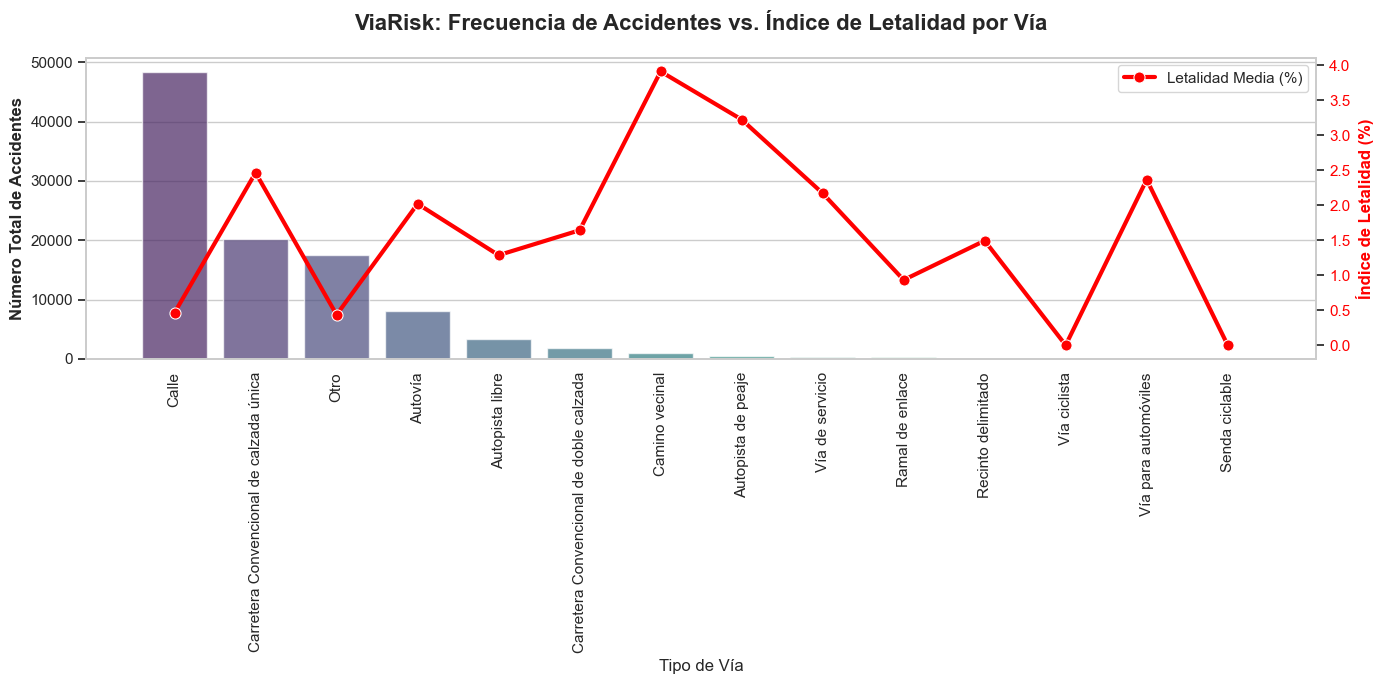

In [73]:

import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. PREPARACIÓN DE DATOS (Lo que ya tenemos) ---
conteo_tipos = df['TIPO_ACCIDENTE_NOMBRE'].value_counts()
tipos_relevantes = conteo_tipos[conteo_tipos > 100].index
df_filtrado = df[df['TIPO_ACCIDENTE_NOMBRE'].isin(tipos_relevantes)].copy()
df_filtrado['INDICE_LETALIDAD'] = (df_filtrado['TOTAL_MU24H'] / df_filtrado['TOTAL_VICTIMAS_24H'] * 100).fillna(0)

# --- 2. AGRUPACIÓN PARA LA GRÁFICA ---
# Agrupamos por tipo de vía para comparar volumen vs riesgo
via_stats = df_filtrado.groupby('TIPO_VIA_NOMBRE').agg({
    'ID_ACCIDENTE': 'count',
    'INDICE_LETALIDAD': 'mean'
}).rename(columns={'ID_ACCIDENTE': 'Total_Accidentes'}).sort_values('Total_Accidentes', ascending=False)

# --- 3. CREACIÓN DE LA GRÁFICA COMBINADA ---
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico de barras: Volumen de accidentes (Frecuencia)
sns.barplot(x=via_stats.index, y=via_stats['Total_Accidentes'], ax=ax1, palette='viridis', alpha=0.7)
ax1.set_ylabel('Número Total de Accidentes', fontsize=12, fontweight='bold')
ax1.set_xlabel('Tipo de Vía', fontsize=12)
ax1.tick_params(axis='x', rotation=90)

# Crear un segundo eje Y para la letalidad
ax2 = ax1.twinx()

# Gráfico de línea: Índice de letalidad (Riesgo)
sns.lineplot(x=via_stats.index, y=via_stats['INDICE_LETALIDAD'], ax=ax2, color='red', marker='o', markersize=8, linewidth=3, label='Letalidad Media (%)')
ax2.set_ylabel('Índice de Letalidad (%)', fontsize=12, fontweight='bold', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(False) # Quitamos el grid del segundo eje para que no se ensucie

# Títulos y ajustes finales
plt.title('ViaRisk: Frecuencia de Accidentes vs. Índice de Letalidad por Vía', fontsize=16, fontweight='bold', pad=20)
fig.tight_layout()

plt.show()

## Tipos de Accdidentes más letales

C:\Users\ELOY\AppData\Local\Temp\ipykernel_30992\4077657926.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


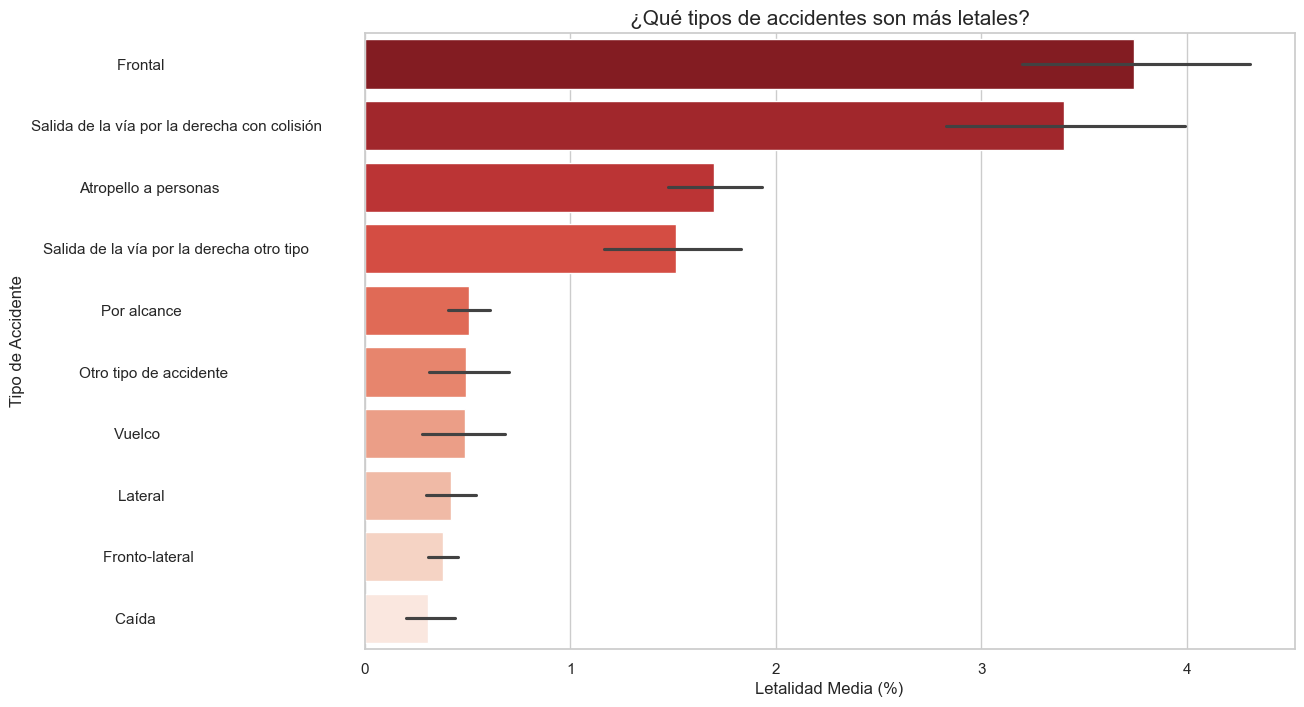

In [102]:
# Filtramos los 10 tipos de accidentes más frecuentes
top_accidentes = df_filtrado['TIPO_ACCIDENTE_NOMBRE'].value_counts().head(10).index
df_top = df_filtrado[df_filtrado['TIPO_ACCIDENTE_NOMBRE'].isin(top_accidentes)]

plt.figure(figsize=(12, 8))
# Ordenamos por letalidad para que la gráfica sea descendente
orden_letalidad = df_top.groupby('TIPO_ACCIDENTE_NOMBRE')['INDICE_LETALIDAD'].mean().sort_values(ascending=False).index

sns.barplot(
    data=df_top, 
    y='TIPO_ACCIDENTE_NOMBRE', 
    x='INDICE_LETALIDAD', 
    order=orden_letalidad,
    palette='Reds_r'
)

plt.title('¿Qué tipos de accidentes son más letales?', fontsize=15)
plt.xlabel('Letalidad Media (%)')
plt.ylabel('Tipo de Accidente')
plt.show()

## Letalidad media por hora del día

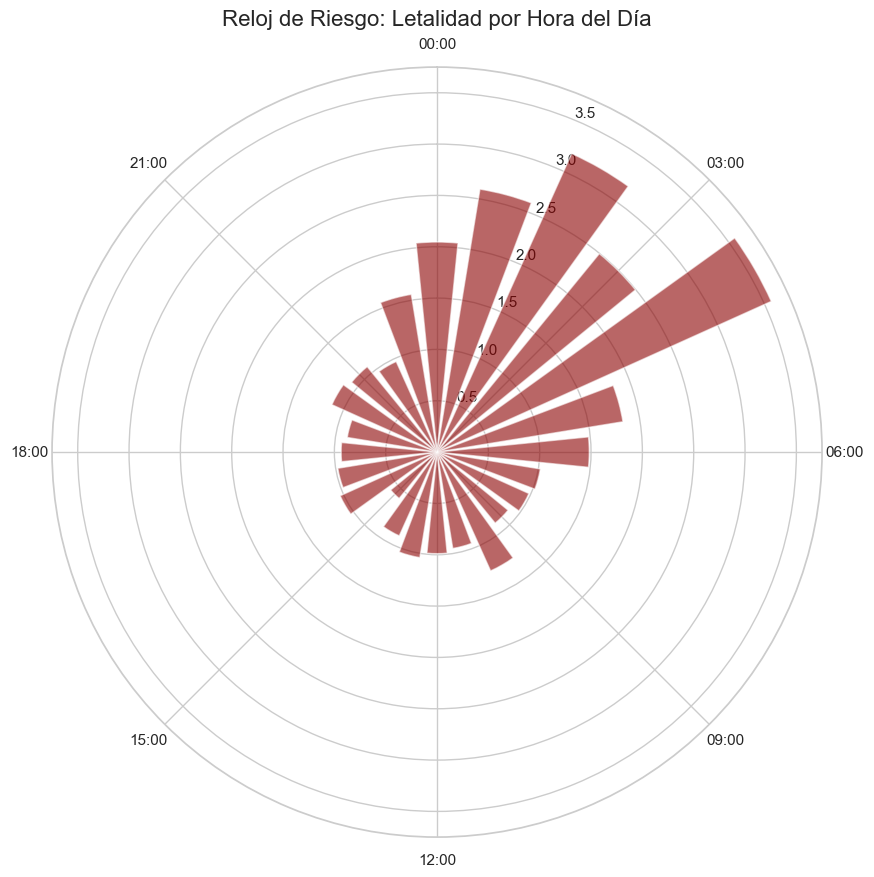

In [101]:
# Preparar datos para el gráfico circular
import numpy as np

# Agrupamos por hora pura (0-23) para tener más detalle
df_horas = df_filtrado.groupby('HORA')['INDICE_LETALIDAD'].mean().reset_index()

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Configuramos los ángulos (convertir 0-23 horas a radianes)
theta = np.linspace(0, 2*np.pi, 24, endpoint=False)
radii = df_horas['INDICE_LETALIDAD'].values

# Dibujar las barras
bars = ax.bar(theta, radii, width=0.2, bottom=0.0, color='darkred', alpha=0.6)

# Ajustar el "reloj"
ax.set_theta_zero_location('N') # El 0 (medianoche) arriba
ax.set_theta_direction(-1)     # Sentido horario
ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))
ax.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00'])

plt.title('Reloj de Riesgo: Letalidad por Hora del Día', fontsize=16, pad=30)
plt.show()

## Letalidad media por hora del día y día de la semana

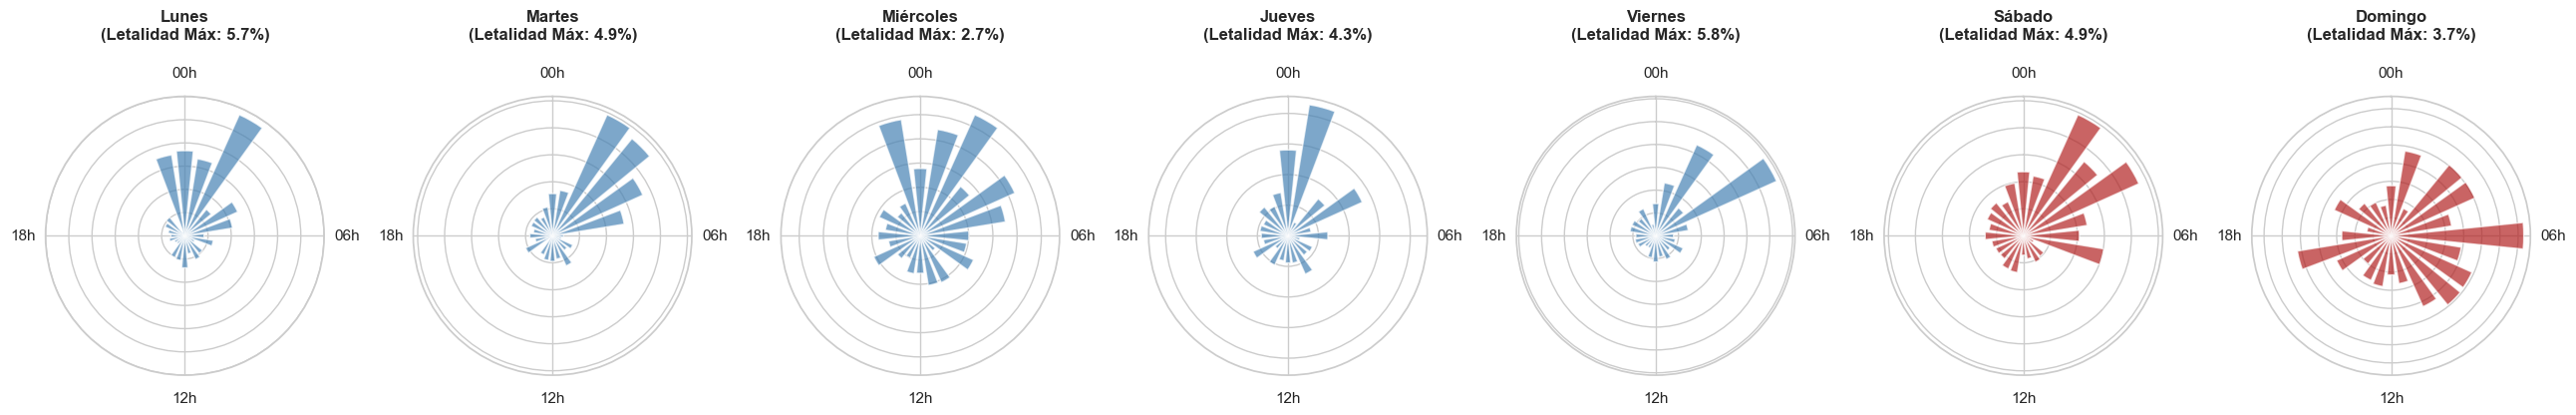

In [112]:
# 1. Definimos la traducción de números a nombres
# Importante: En la DGT, el 1 suele ser Lunes (pero a veces el 1 es Domingo, compruébalo)
mapa_dias = {
    1: 'Lunes', 2: 'Martes', 3: 'Miércoles', 4: 'Jueves', 
    5: 'Viernes', 6: 'Sábado', 7: 'Domingo'
}

# 2. Obtenemos los números de días que existen en el dataset y los ordenamos
dias_numeros = sorted(df_filtrado['DIA_SEMANA'].unique())

# 3. Creamos la figura con un reloj por cada número detectado
fig, axes = plt.subplots(1, len(dias_numeros), figsize=(26, 6), subplot_kw={'projection': 'polar'})

# Si solo hay un día, axes no es una lista, lo convertimos
if len(dias_numeros) == 1: axes = [axes]

for i, num_dia in enumerate(dias_numeros):
    ax = axes[i]
    
    # Filtramos por el NÚMERO del día
    df_dia = df_filtrado[df_filtrado['DIA_SEMANA'] == num_dia]
    
    # Agrupamos por hora (0-23)
    stats_dia = df_dia.groupby('HORA')['INDICE_LETALIDAD'].mean().reindex(range(24), fill_value=0)
    
    theta = np.linspace(0, 2*np.pi, 24, endpoint=False)
    radii = stats_dia.values
    
    # Color: Rojo para el fin de semana (6 y 7)
    color_bar = 'firebrick' if num_dia in [6, 7] else 'steelblue'
    ax.bar(theta, radii, width=0.2, bottom=0.0, color=color_bar, alpha=0.7)
    
    # Título usando el mapa de nombres
    nombre_dia = mapa_dias.get(num_dia, f"Día {num_dia}")
    ax.set_title(f"{nombre_dia}\n(Letalidad Máx: {radii.max():.1f}%)", fontsize=12, fontweight='bold', pad=20)
    
    # Configuración del reloj
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_xticks(np.linspace(0, 2*np.pi, 4, endpoint=False))
    ax.set_xticklabels(['00h', '06h', '12h', '18h'])
    ax.set_yticklabels([]) 

plt.tight_layout()
plt.show()

## Mapa de Infracciones

C:\Users\ELOY\AppData\Local\Temp\ipykernel_30992\144456601.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


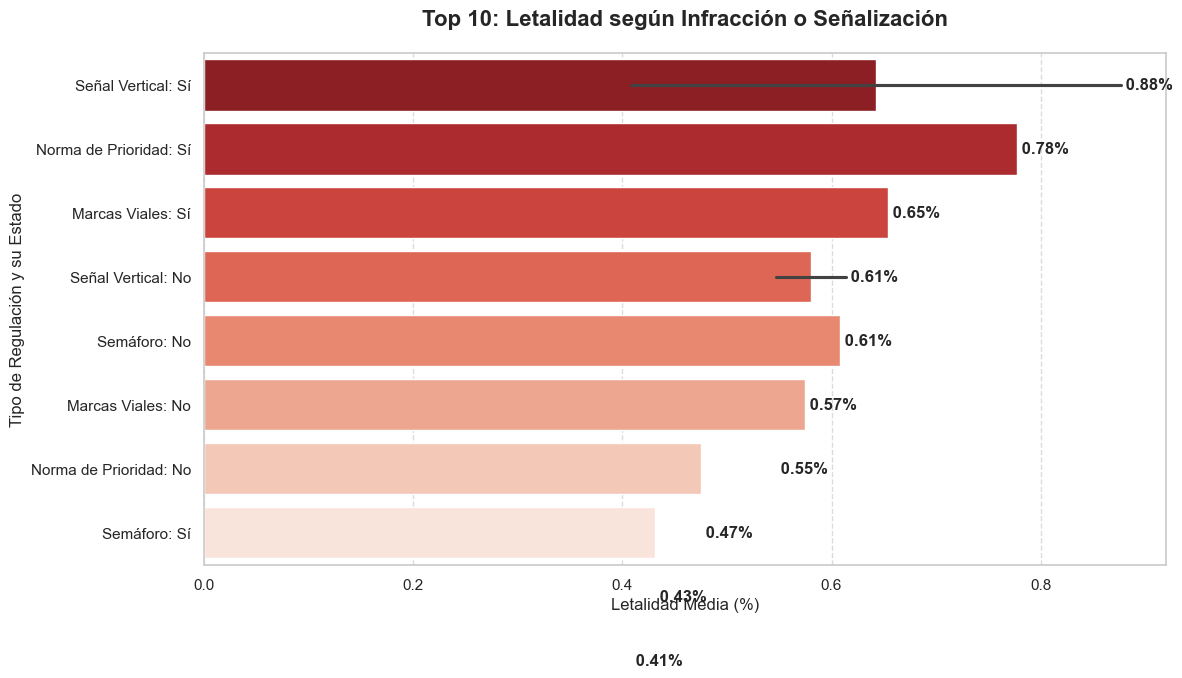

In [119]:
# 1. Diccionario para traducir los prefijos a algo legible
traductor_nombres = {
    'VERT': 'Señal Vertical',
    'SEMAFORO': 'Semáforo',
    'MARCAS': 'Marcas Viales',
    'NORMA': 'Norma de Prioridad',
    'HORIZ': 'Señal Horizontal'
}

resumen_prioridad = []

# 2. Iteramos igual, pero formateando el nombre
for col in cols_prioridad:
    # Filtramos valores que no aportan información (puedes añadir más a la lista)
    ignorar = ['Sin especificar', 'No existe señal', 'Desconocido', 'Ninguna']
    df_temp = df_filtrado[~df_filtrado[col].isin(ignorar)]
    
    if not df_temp.empty:
        media = df_temp.groupby(col)['INDICE_LETALIDAD'].mean()
        
        # Obtenemos el prefijo limpio del traductor
        prefijo_sucio = col.split('_')[1]
        prefijo_limpio = traductor_nombres.get(prefijo_sucio, prefijo_sucio)
        
        for nombre, valor in media.items():
            resumen_prioridad.append({
                'Señal/Norma': f"{prefijo_limpio}: {nombre}", 
                'Letalidad (%)': valor
            })

# 3. Crear DataFrame y graficar
df_priori = pd.DataFrame(resumen_prioridad).sort_values(by='Letalidad (%)', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_priori, 
    x='Letalidad (%)', 
    y='Señal/Norma', 
    palette='Reds_r' # Rojo intenso para peligro
)

# Añadimos etiquetas de valor para mayor claridad
for index, value in enumerate(df_priori['Letalidad (%)']):
    plt.text(value, index, f' {value:.2f}%', va='center', fontweight='bold')

plt.title('Top 10: Letalidad según Infracción o Señalización', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Letalidad Media (%)', fontsize=12)
plt.ylabel('Tipo de Regulación y su Estado', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Tipo de trazado según salida de vía

C:\Users\ELOY\AppData\Local\Temp\ipykernel_30992\186377115.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_salidas, y='TRAZADO_PLANTA_NOMBRE', palette='viridis', order=df_salidas['TRAZADO_PLANTA_NOMBRE'].value_counts().index)


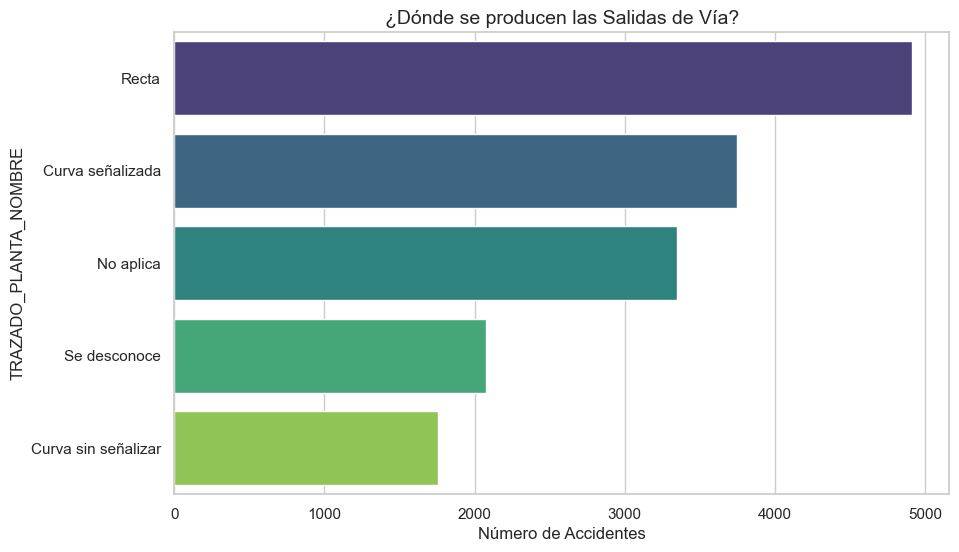

In [131]:
# Filtramos solo salidas de vía
df_salidas = df_filtrado[df_filtrado['TIPO_ACCIDENTE_NOMBRE'].str.contains('Salida', na=False)]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_salidas, y='TRAZADO_PLANTA_NOMBRE', palette='viridis', order=df_salidas['TRAZADO_PLANTA_NOMBRE'].value_counts().index)
plt.title('¿Dónde se producen las Salidas de Vía?', fontsize=14)
plt.xlabel('Número de Accidentes')
plt.show()



In [129]:
import plotly.express as px
# Ejemplo: Mapa de calor interactivo
fig = px.density_mapbox(df_filtrado, lat='LATITUD', lon='LONGITUD', z='INDICE_LETALIDAD', 
                        radius=10, center=dict(lat=40, lon=-3), zoom=5,
                        mapbox_style="stamen-terrain")
fig.write_html("mapa_interactivo.html") # Esto lo puedes meter en un iframe en tu web

C:\Users\ELOY\AppData\Local\Temp\ipykernel_30992\1663424943.py:3: DeprecationWarning: *density_mapbox* is deprecated! Use *density_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.density_mapbox(df_filtrado, lat='LATITUD', lon='LONGITUD', z='INDICE_LETALIDAD',


ValueError: Value of 'lat' is not the name of a column in 'data_frame'. Expected one of ['ID_ACCIDENTE', 'ANYO', 'MES', 'DIA_SEMANA', 'DIA_SEMANA_NOMBRE', 'HORA', 'PROVINCIA', 'COD_MUNICIPIO', 'ZONA', 'ZONA_AGRUPADA', 'CARRETERA', 'KM', 'SENTIDO_1F', 'TITULARIDAD_VIA', 'TIPO_VIA', 'TIPO_VIA_NOMBRE', 'TIPO_ACCIDENTE', 'TIPO_ACCIDENTE_NOMBRE', 'TOTAL_MU24H', 'TOTAL_HG24H', 'TOTAL_HL24H', 'TOTAL_VICTIMAS_24H', 'TOTAL_VEHICULOS', 'MUERTOS_VEHICULOS', 'DIF_MUERTOS', 'NUDO_NOMBRE', 'NUDO_INFO_NOMBRE', 'PRIORI_NORMA_NOMBRE', 'PRIORI_AGENTE_NOMBRE', 'PRIORI_SEMAFORO_NOMBRE', 'PRIORI_VERT_STOP_NOMBRE', 'PRIORI_VERT_CEDA_NOMBRE', 'PRIORI_HORIZ_STOP_NOMBRE', 'PRIORI_HORIZ_CEDA_NOMBRE', 'PRIORI_MARCAS_NOMBRE', 'PRIORI_PEA_NO_ELEV_NOMBRE', 'PRIORI_PEA_ELEV_NOMBRE', 'PRIORI_MARCA_CICLOS_NOMBRE', 'PRIORI_CIRCUNSTANCIAL_NOMBRE', 'PRIORI_OTRA_NOMBRE', 'ACERA_NOMBRE', 'TRAZADO_PLANTA_NOMBRE', 'INDICE_LETALIDAD', 'FRANJA_HORARIA'] but received: LATITUD